In [ ]:
#pip install Flask-Session

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '116d5338-b674-4bf9-8842-3f3a20dda565',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-04-30T03:33:22.934Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9831}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11018, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id               name  symbol                  slug  num_market_pairs  \
0       1            Bitcoin     BTC               bitcoin             11018   
1    1027           Ethereum     ETH              ethereum              8880   
2     825        Tether USDt    USDT                tether             84373   
3    1839                BNB     BNB                   bnb              2153   
4    5426             Solana     SOL                solana               655   
5    3408               USDC    USDC              usd-coin             18755   
6      52                XRP     XRP                   xrp              1307   
7      74           Dogecoin    DOGE              dogecoin               958   
8   11419            Toncoin     TON               toncoin               304   
9    2010            Cardano     ADA               cardano              1157   
10   5994          Shiba Inu    SHIB             shiba-inu               802   
11   5805          Avalanche    AVAX             avalanche               719   
12   1958               TRON     TRX                  tron               972   
13   6636           Polkadot     DOT          polkadot-new               753   
14   1831       Bitcoin Cash     BCH          bitcoin-cash               883   
15   1975          Chainlink    LINK             chainlink              1739   
16   6535      NEAR Protocol    NEAR         near-protocol               398   
17   3890            Polygon   MATIC               polygon              1370   
18      2           Litecoin     LTC              litecoin              1177   
19   8916  Internet Computer     ICP     internet-computer               236   
20   3957       UNUS SED LEO     LEO          unus-sed-leo                46   
21   4943                Dai     DAI  multi-collateral-dai              3200   
22   7083            Uniswap     UNI               uniswap              1004   
23  26081  First Digital USD   FDUSD     first-digital-usd               293   
24   1321   Ethereum Classic     ETC      ethereum-classic               524   
25  21794              Aptos     APT                 aptos               374   
26   4642             Hedera    HBAR                hedera               257   
27   3635             Cronos     CRO                cronos               235   
28   4847             Stacks     STX                stacks               176   
29  27075             Mantle     MNT                mantle                67   
30    512            Stellar     XLM               stellar               589   
31   2280           Filecoin     FIL              filecoin               475   
32   3794             Cosmos    ATOM                cosmos               757   
33  24478               Pepe    PEPE                  pepe               366   
34   3897                OKB     OKB                   okb               121   
35  10603          Immutable     IMX           immutable-x               280   
36   5690             Render    RNDR                render               375   
37   3077            VeChain     VET               vechain               282   
38  11841           Arbitrum     ARB              arbitrum               886   
39  20396              Kaspa     KAS                 kaspa               113   
40  28752          dogwifhat     WIF             dogwifhat               317   
41  22974          Bittensor     TAO             bittensor                60   
42  11840           Optimism      OP     optimism-ethereum               514   
43   1518              Maker     MKR                 maker               470   
44   6719          The Graph     GRT             the-graph               467   
45   7226          Injective     INJ             injective               369   
46    328             Monero     XMR                monero               283   
47   5632            Arweave      AR               arweave               134   
48   2416      Theta Network   THETA         theta-network               196   
49   35

In [ ]:
#pip install Flask-Session

In [ ]:
from flask import Flask, render_template, redirect, request, session
from flask_session import Session

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '116d5338-b674-4bf9-8842-3f3a20dda565',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df1 = pd.json_normalize(data['data'])
    df1['timestamp'] = pd.to_datetime('now')
    df = df._append(df1) 
    

In [6]:
import os
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print('API Runner completed successfully')
    sleep(5)#slep interval
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [7]:
df

id               name  symbol                  slug  num_market_pairs  \
0       1            Bitcoin     BTC               bitcoin             11018   
1    1027           Ethereum     ETH              ethereum              8880   
2     825        Tether USDt    USDT                tether             84373   
3    1839                BNB     BNB                   bnb              2153   
4    5426             Solana     SOL                solana               655   
5    3408               USDC    USDC              usd-coin             18755   
6      52                XRP     XRP                   xrp              1307   
7      74           Dogecoin    DOGE              dogecoin               958   
8   11419            Toncoin     TON               toncoin               304   
9    2010            Cardano     ADA               cardano              1157   
10   5994          Shiba Inu    SHIB             shiba-inu               802   
11   5805          Avalanche    AVAX             avalanche               719   
12   1958               TRON     TRX                  tron               972   
13   6636           Polkadot     DOT          polkadot-new               753   
14   1831       Bitcoin Cash     BCH          bitcoin-cash               883   
15   1975          Chainlink    LINK             chainlink              1739   
16   6535      NEAR Protocol    NEAR         near-protocol               398   
17   3890            Polygon   MATIC               polygon              1370   
18      2           Litecoin     LTC              litecoin              1177   
19   8916  Internet Computer     ICP     internet-computer               236   
20   3957       UNUS SED LEO     LEO          unus-sed-leo                46   
21   4943                Dai     DAI  multi-collateral-dai              3200   
22   7083            Uniswap     UNI               uniswap              1004   
23  26081  First Digital USD   FDUSD     first-digital-usd               293   
24   1321   Ethereum Classic     ETC      ethereum-classic               524   
25  21794              Aptos     APT                 aptos               374   
26   4642             Hedera    HBAR                hedera               257   
27   3635             Cronos     CRO                cronos               235   
28   4847             Stacks     STX                stacks               176   
29  27075             Mantle     MNT                mantle                67   
30    512            Stellar     XLM               stellar               589   
31   2280           Filecoin     FIL              filecoin               475   
32   3794             Cosmos    ATOM                cosmos               757   
33  24478               Pepe    PEPE                  pepe               366   
34   3897                OKB     OKB                   okb               121   
35  10603          Immutable     IMX           immutable-x               280   
36   5690             Render    RNDR                render               375   
37   3077            VeChain     VET               vechain               282   
38  11841           Arbitrum     ARB              arbitrum               886   
39  20396              Kaspa     KAS                 kaspa               113   
40  28752          dogwifhat     WIF             dogwifhat               317   
41  22974          Bittensor     TAO             bittensor                60   
42  11840           Optimism      OP     optimism-ethereum               514   
43   1518              Maker     MKR                 maker               470   
44   6719          The Graph     GRT             the-graph               467   
45   7226          Injective     INJ             injective               369   
46    328             Monero     XMR                monero               283   
47   5632            Arweave      AR               arweave               134   
48   2416      Theta Network   THETA         theta-network               196   
49   35

In [8]:
df.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11018   
1  1027     Ethereum    ETH  ethereum              8880   
2   825  Tether USDt   USDT    tether             84373   
3  1839          BNB    BNB       bnb              2153   
4  5426       Solana    SOL    solana               655   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags  max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...  21000000.0   
1  [pos, smart-contracts, ethereum-ecosystem, coi...         NaN   
2  [stablecoin, asset-backed-stablecoin, avalanch...         NaN   
3  [marketplace, centralized-exchange, payments, ...         NaN   
4  [pos, platform, solana-ecosystem, cms-holdings...         NaN   

   circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0        1.969199e+07  1.969199e+07            False       NaN         1   
1        1.220564e+08  1.220564e+08             True       NaN         2   
2        1.106432e+11  1.130866e+11             True       NaN         3   
3        1.475879e+08  1.475879e+08            False       NaN         4   
4        4.473223e+08  5.749123e+08             True       NaN         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2024-04-30T03:32:00.000Z     63758.332452          2.772396e+10   
1  2024-04-30T03:31:00.000Z      3186.469768          1.464418e+10   
2  2024-04-30T03:31:00.000Z         0.999761          5.066611e+10   
3  2024-04-30T03:31:00.000Z       592.762619          9.219504e+08   
4  2024-04-30T03:31:00.000Z       137.151811          2.502685e+09   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                      54.7092                     0.172401   
1                      22.9268                     0.146786   
2                      36.5656                    -0.007222   
3                      35.2190                    -0.144785   
4                      26.0317                     0.311723   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                      1.746828                    -4.419123   
1                     -0.470314                    -0.345241   
2                     -0.033570                    -0.103524   
3                      0.065701                    -1.748113   
4                      0.648337                   -12.640615   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                     -8.825590                      4.759846   
1                     -9.856524                     -5.208544   
2                     -0.042298                     -0.048808   
3                     -2.486680                     46.290799   
4                    -29.424362                      1.708498   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                     48.451361          1.255528e+12   
1                     36.175310          3.889290e+11   
2                     -0.004173          1.106167e+11   
3                     93.178433          8.748457e+10   
4                     35.916310          6.135107e+10   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                         53.5206                        1.338925e+12   
1                         16.5948                        3.889290e+11   
2 

In [10]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [11]:
df

id               name  symbol                  slug  num_market_pairs  \
0       1            Bitcoin     BTC               bitcoin             11018   
1    1027           Ethereum     ETH              ethereum              8880   
2     825        Tether USDt    USDT                tether             84373   
3    1839                BNB     BNB                   bnb              2153   
4    5426             Solana     SOL                solana               655   
5    3408               USDC    USDC              usd-coin             18755   
6      52                XRP     XRP                   xrp              1307   
7      74           Dogecoin    DOGE              dogecoin               958   
8   11419            Toncoin     TON               toncoin               304   
9    2010            Cardano     ADA               cardano              1157   
10   5994          Shiba Inu    SHIB             shiba-inu               802   
11   5805          Avalanche    AVAX             avalanche               719   
12   1958               TRON     TRX                  tron               972   
13   6636           Polkadot     DOT          polkadot-new               753   
14   1831       Bitcoin Cash     BCH          bitcoin-cash               883   
15   1975          Chainlink    LINK             chainlink              1739   
16   6535      NEAR Protocol    NEAR         near-protocol               398   
17   3890            Polygon   MATIC               polygon              1370   
18      2           Litecoin     LTC              litecoin              1177   
19   8916  Internet Computer     ICP     internet-computer               236   
20   3957       UNUS SED LEO     LEO          unus-sed-leo                46   
21   4943                Dai     DAI  multi-collateral-dai              3200   
22   7083            Uniswap     UNI               uniswap              1004   
23  26081  First Digital USD   FDUSD     first-digital-usd               293   
24   1321   Ethereum Classic     ETC      ethereum-classic               524   
25  21794              Aptos     APT                 aptos               374   
26   4642             Hedera    HBAR                hedera               257   
27   3635             Cronos     CRO                cronos               235   
28   4847             Stacks     STX                stacks               176   
29  27075             Mantle     MNT                mantle                67   
30    512            Stellar     XLM               stellar               589   
31   2280           Filecoin     FIL              filecoin               475   
32   3794             Cosmos    ATOM                cosmos               757   
33  24478               Pepe    PEPE                  pepe               366   
34   3897                OKB     OKB                   okb               121   
35  10603          Immutable     IMX           immutable-x               280   
36   5690             Render    RNDR                render               375   
37   3077            VeChain     VET               vechain               282   
38  11841           Arbitrum     ARB              arbitrum               886   
39  20396              Kaspa     KAS                 kaspa               113   
40  28752          dogwifhat     WIF             dogwifhat               317   
41  22974          Bittensor     TAO             bittensor                60   
42  11840           Optimism      OP     optimism-ethereum               514   
43   1518              Maker     MKR                 maker               470   
44   6719          The Graph     GRT             the-graph               467   
45   7226          Injective     INJ             injective               369   
46    328             Monero     XMR                monero               283   
47   5632            Arweave      AR               arweave               134   
48   2416      Theta Network   THETA         theta-network               196   
49   35

In [14]:
# Groupby the Cryptocurrency rate changes as per various time intervals

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.volume_change_24h',
                                      'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                      'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

quote.USD.percent_change_1h  quote.USD.volume_change_24h  \
name                                                                          
Bitcoin                               -0.04416                     54.49812   
Ethereum                              -0.13882                     22.58922   
Tether USDt                            0.00156                     36.26627   
BNB                                   -0.24070                     34.90725   
Solana                                -0.00631                     26.00228   
USDC                                  -0.00585                     58.71833   
XRP                                   -0.01354                     74.20390   
Dogecoin                              -0.12964                     58.68103   
Toncoin                                0.93695                      6.77997   
Cardano                               -0.29521                     13.76125   
Shiba Inu                             -0.33238                     49.89335   
Avalanche                              0.22452                     89.10865   
TRON                                   0.55961                     39.44562   
Polkadot                              -0.31571                     36.96013   
Bitcoin Cash                           0.13486                     39.55540   
Chainlink                              0.09165                     26.10112   
NEAR Protocol                          0.64379                     -4.64557   
Polygon                                0.24848                     38.71902   
Litecoin                               0.41672                     26.09293   
Internet Computer                      0.25216                     -0.07393   
UNUS SED LEO                           0.00395                     47.76893   
Dai                                   -0.01316                     -8.79822   
Uniswap                                0.02152                    -20.22603   
First Digital USD                     -0.01132                     57.27772   
Ethereum Classic                      -0.05024                    -31.64732   
Aptos                                 -0.19721                     65.54023   
Hedera                                -0.16723                     37.52427   
Cronos                                 1.08773                     30.48013   
Stacks                                -1.08585                    108.43605   
Mantle                                 0.53982                     29.27363   
Stellar                                0.08547                     26.96083   
Filecoin                               0.15205                     29.93305   
Cosmos                                 0.33983                     33.72128   
Pepe                                   0.35367                     12.99938   
OKB                                    0.16300                    -16.72268   
Immutable                             -0.54060                     14.36883   
Render                                -0.27674                     -5.84867   
VeChain                                0.04040                     40.41523   
Arbitrum                              -0.41199                     -2.00635   
Kaspa                                  0.40061                    -25.14460   
dogwifhat                              0.19166                     62.82013   
Bittensor                             -0.04276                    166.39505   
Optimism                               0.60061                    -16.97238   
Maker                                 -0.43686                     32.29838   
The Graph                             -0.25125                     15.63925   
Injective                              0.20402                     55.29648   
Monero                                -1.16532                     16.25440   
Arweave                                0.48628                    -15.52028   
Theta Network                         -0.42207                    408

In [15]:
df3 = df2.stack()
df3


name                                           
Bitcoin            quote.USD.percent_change_1h     -0.04416
                   quote.USD.volume_change_24h     54.49812
                   quote.USD.percent_change_7d     -4.40233
                   quote.USD.percent_change_30d    -8.87336
                   quote.USD.percent_change_60d     4.76354
                   quote.USD.percent_change_90d    48.44981
Ethereum           quote.USD.percent_change_1h     -0.13882
                   quote.USD.volume_change_24h     22.58922
                   quote.USD.percent_change_7d     -0.09172
                   quote.USD.percent_change_30d    -9.86157
                   quote.USD.percent_change_60d    -5.14950
                   quote.USD.percent_change_90d    36.23392
Tether USDt        quote.USD.percent_change_1h      0.00156
                   quote.USD.volume_change_24h     36.26627
                   quote.USD.percent_change_7d     -0.12849
                   quote.USD.percent_change_30d    -

In [16]:
type(df3)

pandas.core.series.Series

In [18]:
df4=df3.to_frame(name='values')
df4

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.04416
                  quote.USD.volume_change_24h   54.49812
                  quote.USD.percent_change_7d   -4.40233
                  quote.USD.percent_change_30d  -8.87336
                  quote.USD.percent_change_60d   4.76354
                  quote.USD.percent_change_90d  48.44981
Ethereum          quote.USD.percent_change_1h   -0.13882
                  quote.USD.volume_change_24h   22.58922
                  quote.USD.percent_change_7d   -0.09172
                  quote.USD.percent_change_30d  -9.86157
                  quote.USD.percent_change_60d  -5.14950
                  quote.USD.percent_change_90d  36.23392
Tether USDt       quote.USD.percent_change_1h    0.00156
                  quote.USD.volume_change_24h   36.26627
                  quote.USD.percent_change_7d   -0.12849
                  quote.USD.percent_change_30d  -0.04471
                  quote.USD.percent_change_60d  -0.05572
                  quote.USD.percent_change_90d  -0.00149
BNB               quote.USD.percent_change_1h   -0.24070
                  quote.USD.volume_change_24h   34.90725
                  quote.USD.percent_change_7d   -1.58839
                  quote.USD.percent_change_30d  -2.42775
                  quote.USD.percent_change_60d  46.44100
                  quote.USD.percent_change_90d  93.34300
Solana            quote.USD.percent_change_1h   -0.00631
                  quote.USD.volume_change_24h   26.00228
                  quote.USD.percent_change_7d  -12.18866
                  quote.USD.percent_change_30d -29.53931
                  quote.USD.percent_change_60d   1.38490
                  quote.USD.percent_change_90d  36.01816
USDC              quote.USD.percent_change_1h   -0.00585
                  quote.USD.volume_change_24h   58.71833
                  quote.USD.percent_change_7d   -0.05433
                  quote.USD.percent_change_30d  -0.00088
                  quote.USD.percent_change_60d   0.00149
                  quote.USD.percent_change_90d  -0.01362
XRP               quote.USD.percent_change_1h   -0.01354
                  quote.USD.volume_change_24h   74.20390
                  quote.USD.percent_change_7d   -6.31689
                  quote.USD.percent_change_30d -17.49902
                  quote.USD.percent_change_60d -12.65421
                  quote.USD.percent_change_90d   0.95037
Dogecoin          quote.USD.percent_change_1h   -0.12964
                  quote.USD.volume_change_24h   58.68103
                  quote.USD.percent_change_7d   -9.67035
                  quote.USD.percent_change_30d -28.72151
                  quote.USD.percent_change_60d  20.48579
                  quote.USD.percent_change_90d  79.62460
Toncoin           quote.USD.percent_change_1h    0.93695
                  quote.USD.volume_change_24h    6.77997
                  quote.USD.percent_change_7d   -8.71239
                  quote.USD.percent_change_30d   5.78891
                  quote.USD.percent_change_60d 117.63021
                  quote.USD.percent_change_90d 161.24468
Cardano           quote.USD.percent_change_1h   -0.29521
                  quote.USD.volume_change_24h   13.76125
                  quote.USD.percent_change_7d  -10.50246
                  quote.USD.percent_change_30d -29.17213
                  quote.USD.percent_change_60d -32.00824
                  quote.USD.percent_change_90d -10.52664
Shiba Inu         quote.USD.percent_change_1h   -0.33238
                  quote.USD.volume_change_24h   49.89335
                  quote.USD.percent_change_7d   -8.84075
                  quote.USD.percent_change_30d -20.06799
                  quote.USD.percent_change_60d  91.00675
                  quote.USD.percent_change_90d 165.20798
Avalanche         quote.USD.percent_change_1h    0.22452
                  quote.USD.volume_change_24h   89.10865
                  quote.USD.percent_change_7d   -9.98729
   

In [19]:
type(df4)

pandas.core.frame.DataFrame

In [20]:
df4.count()

values    600
dtype: int64

In [23]:
#Adding Index to the dataframes
# first df5=df4.set_index(index)
# then df5=df4.reset_index()

index = pd.Index(range(600))

df5=df4.reset_index()
df5


name                       level_1    values
0              Bitcoin   quote.USD.percent_change_1h  -0.04416
1              Bitcoin   quote.USD.volume_change_24h  54.49812
2              Bitcoin   quote.USD.percent_change_7d  -4.40233
3              Bitcoin  quote.USD.percent_change_30d  -8.87336
4              Bitcoin  quote.USD.percent_change_60d   4.76354
5              Bitcoin  quote.USD.percent_change_90d  48.44981
6             Ethereum   quote.USD.percent_change_1h  -0.13882
7             Ethereum   quote.USD.volume_change_24h  22.58922
8             Ethereum   quote.USD.percent_change_7d  -0.09172
9             Ethereum  quote.USD.percent_change_30d  -9.86157
10            Ethereum  quote.USD.percent_change_60d  -5.14950
11            Ethereum  quote.USD.percent_change_90d  36.23392
12         Tether USDt   quote.USD.percent_change_1h   0.00156
13         Tether USDt   quote.USD.volume_change_24h  36.26627
14         Tether USDt   quote.USD.percent_change_7d  -0.12849
15         Tether USDt  quote.USD.percent_change_30d  -0.04471
16         Tether USDt  quote.USD.percent_change_60d  -0.05572
17         Tether USDt  quote.USD.percent_change_90d  -0.00149
18                 BNB   quote.USD.percent_change_1h  -0.24070
19                 BNB   quote.USD.volume_change_24h  34.90725
20                 BNB   quote.USD.percent_change_7d  -1.58839
21                 BNB  quote.USD.percent_change_30d  -2.42775
22                 BNB  quote.USD.percent_change_60d  46.44100
23                 BNB  quote.USD.percent_change_90d  93.34300
24              Solana   quote.USD.percent_change_1h  -0.00631
25              Solana   quote.USD.volume_change_24h  26.00228
26              Solana   quote.USD.percent_change_7d -12.18866
27              Solana  quote.USD.percent_change_30d -29.53931
28              Solana  quote.USD.percent_change_60d   1.38490
29              Solana  quote.USD.percent_change_90d  36.01816
30                USDC   quote.USD.percent_change_1h  -0.00585
31                USDC   quote.USD.volume_change_24h  58.71833
32                USDC   quote.USD.percent_change_7d  -0.05433
33                USDC  quote.USD.percent_change_30d  -0.00088
34                USDC  quote.USD.percent_change_60d   0.00149
35                USDC  quote.USD.percent_change_90d  -0.01362
36                 XRP   quote.USD.percent_change_1h  -0.01354
37                 XRP   quote.USD.volume_change_24h  74.20390
38                 XRP   quote.USD.percent_change_7d  -6.31689
39                 XRP  quote.USD.percent_change_30d -17.49902
40                 XRP  quote.USD.percent_change_60d -12.65421
41                 XRP  quote.USD.percent_change_90d   0.95037
42            Dogecoin   quote.USD.percent_change_1h  -0.12964
43            Dogecoin   quote.USD.volume_change_24h  58.68103
44            Dogecoin   quote.USD.percent_change_7d  -9.67035
45            Dogecoin  quote.USD.percent_change_30d -28.72151
46            Dogecoin  quote.USD.percent_change_60d  20.48579
47            Dogecoin  quote.USD.percent_change_90d  79.62460
48             Toncoin   quote.USD.percent_change_1h   0.93695
49             Toncoin   quote.USD.volume_change_24h   6.77997
50             Toncoin   quote.USD.percent_change_7d  -8.71239
51             Toncoin  quote.USD.percent_change_30d   5.78891
52             Toncoin  quote.USD.percent_change_60d 117.63021
53             Toncoin  quote.USD.percent_change_90d 161.24468
54             Cardano   quote.USD.percent_change_1h  -0.29521
55             Cardano   quote.USD.volume_change_24h  13.76125
56             Cardano   quote.USD.percent_change_7d -10.50246
57             Cardano  quote.USD.percent_change_30d -29.17213
58             Cardano  quote.USD.percent_change_60d -32.00824
59             Cardano  quote.USD.percent_change_90d -10.52664
60           Shiba Inu   quote.USD.percent_change_1h  -0.33238
61           Shiba Inu   quote.USD.volume_change_24h  49.89335
62           Shiba Inu   quote.USD.percent_change

In [26]:
# Rename the 'level_1' column to 'change_duration'
df6 = df5.rename(columns={'level_1': 'change_duration'})
df6

name               change_duration    values
0              Bitcoin   quote.USD.percent_change_1h  -0.04416
1              Bitcoin   quote.USD.volume_change_24h  54.49812
2              Bitcoin   quote.USD.percent_change_7d  -4.40233
3              Bitcoin  quote.USD.percent_change_30d  -8.87336
4              Bitcoin  quote.USD.percent_change_60d   4.76354
5              Bitcoin  quote.USD.percent_change_90d  48.44981
6             Ethereum   quote.USD.percent_change_1h  -0.13882
7             Ethereum   quote.USD.volume_change_24h  22.58922
8             Ethereum   quote.USD.percent_change_7d  -0.09172
9             Ethereum  quote.USD.percent_change_30d  -9.86157
10            Ethereum  quote.USD.percent_change_60d  -5.14950
11            Ethereum  quote.USD.percent_change_90d  36.23392
12         Tether USDt   quote.USD.percent_change_1h   0.00156
13         Tether USDt   quote.USD.volume_change_24h  36.26627
14         Tether USDt   quote.USD.percent_change_7d  -0.12849
15         Tether USDt  quote.USD.percent_change_30d  -0.04471
16         Tether USDt  quote.USD.percent_change_60d  -0.05572
17         Tether USDt  quote.USD.percent_change_90d  -0.00149
18                 BNB   quote.USD.percent_change_1h  -0.24070
19                 BNB   quote.USD.volume_change_24h  34.90725
20                 BNB   quote.USD.percent_change_7d  -1.58839
21                 BNB  quote.USD.percent_change_30d  -2.42775
22                 BNB  quote.USD.percent_change_60d  46.44100
23                 BNB  quote.USD.percent_change_90d  93.34300
24              Solana   quote.USD.percent_change_1h  -0.00631
25              Solana   quote.USD.volume_change_24h  26.00228
26              Solana   quote.USD.percent_change_7d -12.18866
27              Solana  quote.USD.percent_change_30d -29.53931
28              Solana  quote.USD.percent_change_60d   1.38490
29              Solana  quote.USD.percent_change_90d  36.01816
30                USDC   quote.USD.percent_change_1h  -0.00585
31                USDC   quote.USD.volume_change_24h  58.71833
32                USDC   quote.USD.percent_change_7d  -0.05433
33                USDC  quote.USD.percent_change_30d  -0.00088
34                USDC  quote.USD.percent_change_60d   0.00149
35                USDC  quote.USD.percent_change_90d  -0.01362
36                 XRP   quote.USD.percent_change_1h  -0.01354
37                 XRP   quote.USD.volume_change_24h  74.20390
38                 XRP   quote.USD.percent_change_7d  -6.31689
39                 XRP  quote.USD.percent_change_30d -17.49902
40                 XRP  quote.USD.percent_change_60d -12.65421
41                 XRP  quote.USD.percent_change_90d   0.95037
42            Dogecoin   quote.USD.percent_change_1h  -0.12964
43            Dogecoin   quote.USD.volume_change_24h  58.68103
44            Dogecoin   quote.USD.percent_change_7d  -9.67035
45            Dogecoin  quote.USD.percent_change_30d -28.72151
46            Dogecoin  quote.USD.percent_change_60d  20.48579
47            Dogecoin  quote.USD.percent_change_90d  79.62460
48             Toncoin   quote.USD.percent_change_1h   0.93695
49             Toncoin   quote.USD.volume_change_24h   6.77997
50             Toncoin   quote.USD.percent_change_7d  -8.71239
51             Toncoin  quote.USD.percent_change_30d   5.78891
52             Toncoin  quote.USD.percent_change_60d 117.63021
53             Toncoin  quote.USD.percent_change_90d 161.24468
54             Cardano   quote.USD.percent_change_1h  -0.29521
55             Cardano   quote.USD.volume_change_24h  13.76125
56             Cardano   quote.USD.percent_change_7d -10.50246
57             Cardano  quote.USD.percent_change_30d -29.17213
58             Cardano  quote.USD.percent_change_60d -32.00824
59             Cardano  quote.USD.percent_change_90d -10.52664
60           Shiba Inu   quote.USD.percent_change_1h  -0.33238
61           Shiba Inu   quote.USD.volume_change_24h  49.89335
62           Shiba Inu   quote.USD.percent_change

In [34]:
df6['change_duration'] = df6['change_duration'].replace(['quote.USD.percent_change_1h','quote.USD.volume_change_24h',
                                      'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                      'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                        ['1HR','24H','7D','30D','60D','90D'])
df6

name change_duration    values
0              Bitcoin             1HR  -0.04416
1              Bitcoin             24H  54.49812
2              Bitcoin              7D  -4.40233
3              Bitcoin             30D  -8.87336
4              Bitcoin             60D   4.76354
5              Bitcoin             90D  48.44981
6             Ethereum             1HR  -0.13882
7             Ethereum             24H  22.58922
8             Ethereum              7D  -0.09172
9             Ethereum             30D  -9.86157
10            Ethereum             60D  -5.14950
11            Ethereum             90D  36.23392
12         Tether USDt             1HR   0.00156
13         Tether USDt             24H  36.26627
14         Tether USDt              7D  -0.12849
15         Tether USDt             30D  -0.04471
16         Tether USDt             60D  -0.05572
17         Tether USDt             90D  -0.00149
18                 BNB             1HR  -0.24070
19                 BNB             24H  34.90725
20                 BNB              7D  -1.58839
21                 BNB             30D  -2.42775
22                 BNB             60D  46.44100
23                 BNB             90D  93.34300
24              Solana             1HR  -0.00631
25              Solana             24H  26.00228
26              Solana              7D -12.18866
27              Solana             30D -29.53931
28              Solana             60D   1.38490
29              Solana             90D  36.01816
30                USDC             1HR  -0.00585
31                USDC             24H  58.71833
32                USDC              7D  -0.05433
33                USDC             30D  -0.00088
34                USDC             60D   0.00149
35                USDC             90D  -0.01362
36                 XRP             1HR  -0.01354
37                 XRP             24H  74.20390
38                 XRP              7D  -6.31689
39                 XRP             30D -17.49902
40                 XRP             60D -12.65421
41                 XRP             90D   0.95037
42            Dogecoin             1HR  -0.12964
43            Dogecoin             24H  58.68103
44            Dogecoin              7D  -9.67035
45            Dogecoin             30D -28.72151
46            Dogecoin             60D  20.48579
47            Dogecoin             90D  79.62460
48             Toncoin             1HR   0.93695
49             Toncoin             24H   6.77997
50             Toncoin              7D  -8.71239
51             Toncoin             30D   5.78891
52             Toncoin             60D 117.63021
53             Toncoin             90D 161.24468
54             Cardano             1HR  -0.29521
55             Cardano             24H  13.76125
56             Cardano              7D -10.50246
57             Cardano             30D -29.17213
58             Cardano             60D -32.00824
59             Cardano             90D -10.52664
60           Shiba Inu             1HR  -0.33238
61           Shiba Inu             24H  49.89335
62           Shiba Inu              7D  -8.84075
63           Shiba Inu             30D -20.06799
64           Shiba Inu             60D  91.00675
65           Shiba Inu             90D 165.20798
66           Avalanche             1HR   0.22452
67           Avalanche             24H  89.10865
68           Avalanche              7D  -9.98729
69           Avalanche             30D -34.27917
70           Avalanche             60D -17.45995
71           Avalanche             90D   0.35853
72                TRON             1HR   0.55961
73                TRON             24H  39.44562
74                TRON              7D   7.48496
75                TRON             30D  -2.12048
76                TRON             60D -15.08813
77                TRON             90D   6.99817
78            Polkadot             1HR  -0.31571
79            Polkadot             24H  36.96013
80            Polkadot              7D -10.90149


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

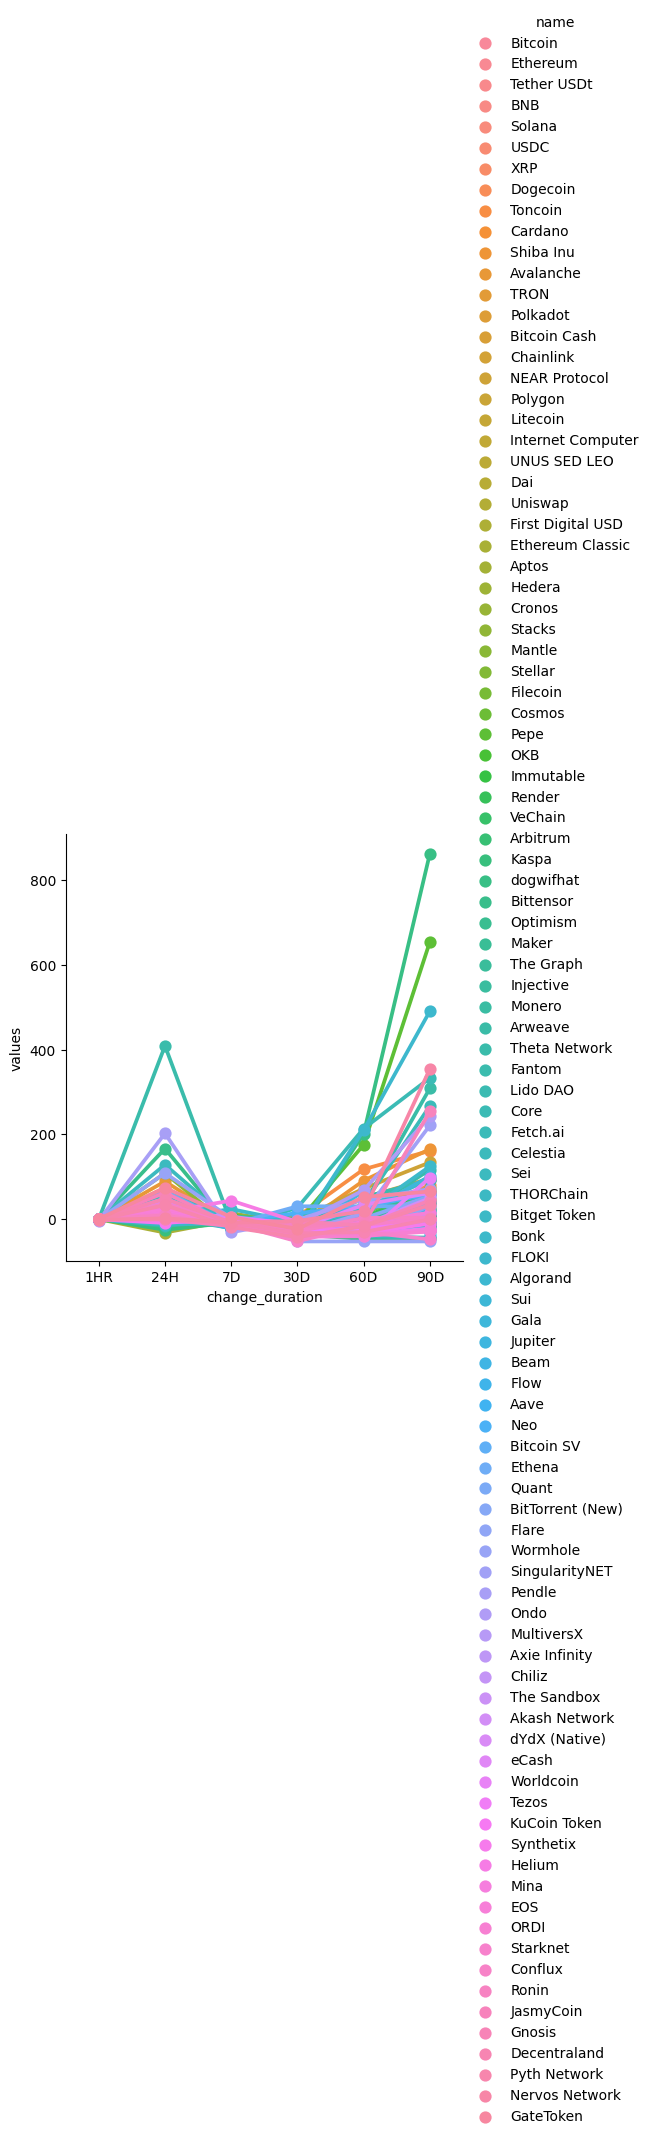

In [40]:
sns.catplot(x='change_duration',y='values', hue = 'name', data = df6, kind = 'point')

In [45]:
df7 = df[['name','quote.USD.price','timestamp']]
df7

name  quote.USD.price                  timestamp
0             Bitcoin      63758.33245 2024-04-29 23:33:35.944796
1            Ethereum       3186.46977 2024-04-29 23:33:35.944796
2         Tether USDt          0.99976 2024-04-29 23:33:35.944796
3                 BNB        592.76262 2024-04-29 23:33:35.944796
4              Solana        137.15181 2024-04-29 23:33:35.944796
5                USDC          1.00012 2024-04-29 23:33:35.944796
6                 XRP          0.51483 2024-04-29 23:33:35.944796
7            Dogecoin          0.14374 2024-04-29 23:33:35.944796
8             Toncoin          5.40362 2024-04-29 23:33:35.944796
9             Cardano          0.45785 2024-04-29 23:33:35.944796
10          Shiba Inu          0.00002 2024-04-29 23:33:35.944796
11          Avalanche         35.02445 2024-04-29 23:33:35.944796
12               TRON          0.11982 2024-04-29 23:33:35.944796
13           Polkadot          6.58614 2024-04-29 23:33:35.944796
14       Bitcoin Cash        463.56434 2024-04-29 23:33:35.944796
15          Chainlink         14.00484 2024-04-29 23:33:35.944796
16      NEAR Protocol          6.90645 2024-04-29 23:33:35.944796
17            Polygon          0.70170 2024-04-29 23:33:35.944796
18           Litecoin         83.47308 2024-04-29 23:33:35.944796
19  Internet Computer         13.28357 2024-04-29 23:33:35.944796
20       UNUS SED LEO          5.84514 2024-04-29 23:33:35.944796
21                Dai          1.00010 2024-04-29 23:33:35.944796
22            Uniswap          7.69603 2024-04-29 23:33:35.944796
23  First Digital USD          0.99926 2024-04-29 23:33:35.944796
24   Ethereum Classic         27.57475 2024-04-29 23:33:35.944796
25              Aptos          9.17930 2024-04-29 23:33:35.944796
26             Hedera          0.10176 2024-04-29 23:33:35.944796
27             Cronos          0.13512 2024-04-29 23:33:35.944796
28             Stacks          2.44932 2024-04-29 23:33:35.944796
29             Mantle          1.03088 2024-04-29 23:33:35.944796
30            Stellar          0.11171 2024-04-29 23:33:35.944796
31           Filecoin          5.91903 2024-04-29 23:33:35.944796
32             Cosmos          8.18465 2024-04-29 23:33:35.944796
33               Pepe          0.00001 2024-04-29 23:33:35.944796
34                OKB         51.68185 2024-04-29 23:33:35.944796
35          Immutable          2.09733 2024-04-29 23:33:35.944796
36             Render          7.81333 2024-04-29 23:33:35.944796
37            VeChain          0.03940 2024-04-29 23:33:35.944796
38           Arbitrum          1.05226 2024-04-29 23:33:35.944796
39              Kaspa          0.11458 2024-04-29 23:33:35.944796
40          dogwifhat          2.68940 2024-04-29 23:33:35.944796
41          Bittensor        399.49151 2024-04-29 23:33:35.944796
42           Optimism          2.53585 2024-04-29 23:33:35.944796
43              Maker       2794.19654 2024-04-29 23:33:35.944796
44          The Graph          0.25427 2024-04-29 23:33:35.944796
45          Injective         25.68411 2024-04-29 23:33:35.944796
46             Monero        127.74116 2024-04-29 23:33:35.944796
47            Arweave         35.77268 2024-04-29 23:33:35.944796
48      Theta Network          2.17231 2024-04-29 23:33:35.944796
49             Fantom          0.71263 2024-04-29 23:33:35.944796
50           Lido DAO          2.15070 2024-04-29 23:33:35.944796
51               Core          2.08203 2024-04-29 23:33:35.944796
52           Fetch.ai          2.14892 2024-04-29 23:33:35.944796
53           Celestia          9.83989 2024-04-29 23:33:35.944796
54                Sei          0.62114 2024-04-29 23:33:35.944796
55          THORChain          5.07467 2024-04-29 23:33:35.944796
56       Bitget Token          1.16347 2024-04-29 23:33:35.944796
57               Bonk          0.00002 2024-04-29 23:33:35.944796
58              FLOKI          0.00017 2024-04-29 23:33:35.944796
59           Algorand          0.19007 2024-04-29 23:33:3

In [46]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name =='Bitcoin'")
df8

name  quote.USD.price                  timestamp
0  Bitcoin      63758.33245 2024-04-29 23:33:35.944796
0  Bitcoin      63728.20090 2024-04-29 23:36:42.160377
0  Bitcoin      63728.20090 2024-04-29 23:36:47.366949
0  Bitcoin      63728.20090 2024-04-29 23:36:52.597772
0  Bitcoin      63728.20090 2024-04-29 23:36:57.835978
0  Bitcoin      63728.20090 2024-04-29 23:37:03.004843

In [48]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name =='Cosmos'")
df9

name  quote.USD.price                  timestamp
32  Cosmos          8.18465 2024-04-29 23:33:35.944796
32  Cosmos          8.19174 2024-04-29 23:36:42.160377
32  Cosmos          8.19174 2024-04-29 23:36:47.366949
32  Cosmos          8.19174 2024-04-29 23:36:52.597772
32  Cosmos          8.19174 2024-04-29 23:36:57.835978
32  Cosmos          8.19174 2024-04-29 23:37:03.004843

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

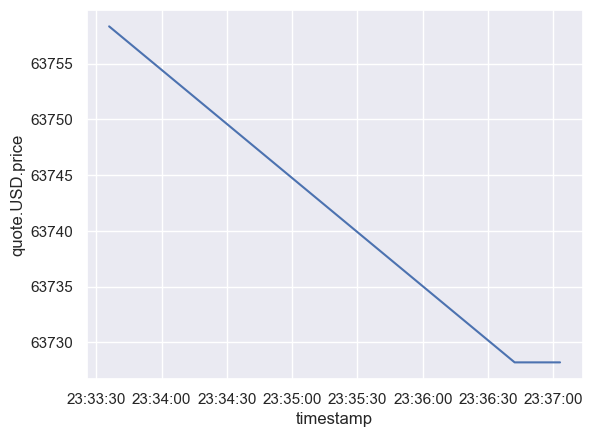

In [50]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)